In [58]:
import pandas as pd
import numpy as np
import geopandas
import geopy
from geopy.geocoders import Nominatim
from geopy import distance
from geopy.extra.rate_limiter import RateLimiter
from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
properties_df = pd.read_csv("properties-17837.csv",index_col=0)

In [25]:
properties_df = properties_df[properties_df['list-card-type']!="Lot / Land for sale"]

In [28]:
properties_df['list-card-price'] = properties_df['list-card-price'].str.replace("\$|,|\+",'').astype(np.int64)

In [29]:
properties_df['beds'] = properties_df['list-card-details'].str.extract("(.+) bds")
properties_df['beds'] = properties_df['beds'].astype(np.int64)
properties_df['baths'] = properties_df['list-card-details'].str.extract("bds(.+) ba")
properties_df['baths'] = properties_df['baths'].astype(np.int64)
properties_df['floorspace'] = properties_df['list-card-details'].str.extract("ba(.+) sqft")
properties_df['floorspace'] = properties_df['floorspace'].str.replace(',','').astype(np.int64)
properties_df['street'] = properties_df['list-card-addr'].str.extract("[0-9]+ (.+) ")

In [30]:
properties_df.head()

,list-card,list-card-info,list-card-addr,list-card-type,list-card-price,list-card-details,beds,baths,floorspace,street
0,"614 Maclay Ave, Lewisburg, PA 17837House for s...","614 Maclay Ave, Lewisburg, PA 17837House for s...","614 Maclay Ave, Lewisburg, PA 17837",House for sale,189900,"3 bds2 ba1,422 sqft",3,2,1422,"Maclay Ave, Lewisburg, PA"
1,"26 Saint Mary St, Lewisburg, PA 17837House for...","26 Saint Mary St, Lewisburg, PA 17837House for...","26 Saint Mary St, Lewisburg, PA 17837",House for sale,100000,"3 bds2 ba1,156 sqft",3,2,1156,"Saint Mary St, Lewisburg, PA"
2,"1319 W Market St, Lewisburg, PA 17837House for...","1319 W Market St, Lewisburg, PA 17837House for...","1319 W Market St, Lewisburg, PA 17837",House for sale,105000,"3 bds2 ba1,361 sqft",3,2,1361,"W Market St, Lewisburg, PA"
3,"110 Lowe St, Lewisburg, PA 17837House for sale...","110 Lowe St, Lewisburg, PA 17837House for sale...","110 Lowe St, Lewisburg, PA 17837",House for sale,349900,"4 bds3 ba2,592 sqft",4,3,2592,"Lowe St, Lewisburg, PA"
4,"560 Hardscrabble Ln, Lewisburg, PA 17837House ...","560 Hardscrabble Ln, Lewisburg, PA 17837House ...","560 Hardscrabble Ln, Lewisburg, PA 17837",House for sale,1999999,"5 bds6 ba8,170 sqft",5,6,8170,"Hardscrabble Ln, Lewisburg, PA"


In [47]:
locator_Nominatim = geopy.Nominatim(user_agent="myGeocoder")
olin_science=locator_Nominatim.geocode("Olin Science, Vaughan Lit Drive, College Park, Union County, PA, 17837")

In [56]:
buckenell_math_lat_long=tuple(olin_science.point)[:2]
buckenell_math_lat_long

(40.955516450000005, -76.88276067249578)

In [36]:
locator_ArcGIS = geopy.ArcGIS(user_agent="myGeocoder")
locator_ArcGIS.geocode("614 Maclay Ave, Lewisburg, PA 17837")

Location(614 Maclay Ave, Lewisburg, Pennsylvania, 17837, (40.96913573910785, -76.89508247833125, 0.0))

In [37]:
geocode_Nominatim_rate_limited = RateLimiter(locator_Nominatim.geocode, min_delay_seconds=1)
geocode_ArcGIS_rate_limited = RateLimiter(locator_ArcGIS.geocode, min_delay_seconds=1)

In [39]:
properties_df['location_ArcGIS'] = properties_df['list-card-addr'].apply(geocode_ArcGIS_rate_limited)

In [87]:
properties_df['latitude']=properties_df['location_ArcGIS'].apply(lambda loc: loc.latitude)
properties_df['longitude']=properties_df['location_ArcGIS'].apply(lambda loc: loc.longitude)

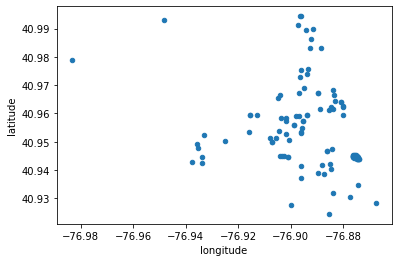

In [88]:
properties_df.plot.scatter(x='longitude',y='latitude')

In [89]:
def distance_to_math(location):
    return distance.distance(location, buckenell_math_lat_long).miles

In [90]:
properties_df['distance_to_math_dept'] = properties_df['point'].apply(distance_to_math)

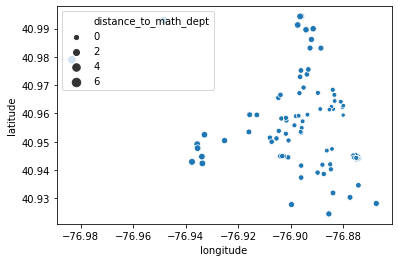

In [91]:
sns.scatterplot(data=properties_df,x='longitude',y='latitude',size='distance_to_math_dept')

In [92]:
properties_df.to_csv("properties-17837-enriched.csv")